## <center>Elements Of Data Science - F2020</center>
# <center>Week 11: Clustering and Recommendation Systems<center>
### <center>11/30/2020</center>

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_style('darkgrid')
%matplotlib inline

# TODOs

- Readings:
  - PDSH: [Chap 3.11 Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
  - PDSH: [Chap 5.06 Example: Predicting Bicycle Traffic](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic)
  - Recommended: DSFS: [Chap 9: Getting Data](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_103)
  - Recommended: DSFS: [Chap 23: Databases and SQL](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_275)
  - Optional: Python for Data Analysis: [Chap 11: Time Series](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d1605925%26site%3dehost-live%26scope%3dsite&ebv=EB&ppid=pp_317)
  - Optional: PML: [Chap 9: Embedding a Machine Learning Model into a Web Application](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3de025xna%26AN%3d1606531%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_281)
  
<br>
<br>

- HW3, Due Friday Dec 4th 11:59pm
<br>

- Answer and submit Quiz 11, **Sunday Dec 6th, 11:59pm ET**

# Today

- **Aggregating with groupby**
- **Clustering**
- **Recommendation Systems**
- **Time-Series Data?**

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Aggregations Over Groups: `groupby`

In [2]:
# Example data with a categorical feature
df = pd.read_csv('../data/yellowcab_demo.csv',parse_dates=['pickup_datetime','dropoff_datetime'])
df.head(2)

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,payment_type
0,2017-01-05 14:49:04,2017-01-05 14:53:53,0.89,5.5,1.26,Credit card
1,2017-01-15 01:07:22,2017-01-15 01:26:47,2.70,14.0,0.00,Cash


In [3]:
# We looked at taking aggregations over all rows or subsets of rows
df.trip_distance.mean()

2.8800100000000004

In [4]:
# This dataset contains a categorical feature
df.payment_type.value_counts()

Credit card    663
Cash           335
No charge        2
Name: payment_type, dtype: int64

# Aggregations Over Groups: `groupby`

In [5]:
# How can we take a mean per category?
df.groupby('payment_type').mean()

,trip_distance,fare_amount,tip_amount
payment_type,,,
Cash,2.732209,11.856716,0.000000
Credit card,2.961870,12.761086,2.683322
No charge,0.500000,5.000000,0.000000


In [6]:
# Specifying a single column for the aggregation
df.groupby('payment_type')['trip_distance'].mean()

payment_type
Cash           2.732209
Credit card    2.961870
No charge      0.500000
Name: trip_distance, dtype: float64

# Aggregations Over Groups: `groupby`

In [7]:
# Specifying multiple grouping columns, aggregation columns, and aggregations
df['tip_given'] = df.tip_amount > 0
df.groupby(['tip_given','payment_type'])[['trip_distance','fare_amount']].agg(['mean','std'])

trip_distance           fare_amount           
                                mean       std        mean        std
tip_given payment_type                                               
False     Cash              2.732209  4.123076   11.856716  11.634738
          Credit card       2.601519  3.285537   12.341772  11.325189
          No charge         0.500000  0.707107    5.000000   3.535534
True      Credit card       3.010616  3.455906   12.817808  10.241810

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Clustering
<br>

- Can we group our data based on the features alone?
- **Unsupervised:** There is no label/target
- Use similarity to group $X$ into $k$ clusters
<br>

- Many methods:
  - **k-Means**
  - **Heirarchical Agglomerative Clustering**
  - Spectral Clustering
  - DBScan
  - ...

# Why do Clustering?
<br>

- Exploratory data analysis
- Group media: images, music, news articles,...
- Group people: social network
- Science applications: gene families, psychological groups,...
- Image segmentation: group pixels, regions, ...
- ...

# Clustering: K-Means
<br>

- Not to be confused with k-NN!
- Idea:
  - Finds $k$ points in space as cluster centers (means)
  - Assigns datapoints to their closest cluster mean
- Need to specify the number of clusters $k$ up front
- sklearn uses euclidean distance to judge similarity

# $k$-Means: How it works

```
FIRST: choose initial k points (means)

A: fix means -> assign all datapoints to their closest mean

B: fix cluster assignments -> recalculate means

RETURN TO A and Repeat until convergence!
```

# Load Example Data

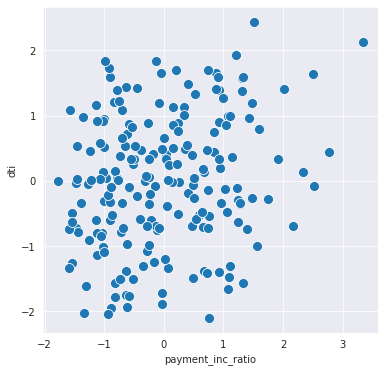

In [8]:
# loading and plotting the data
data = pd.read_csv('../data/loan200.csv')[['payment_inc_ratio','dti']]
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
fig,ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(x='payment_inc_ratio',y='dti',data=X,s=100);

# KMeans in sklearn

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, init='random') # default init=k-means++

c = km.fit_predict(X)

In [10]:
# cluster assignments of first 10 datapoints
c[:10]

array([2, 3, 1, 0, 1, 1, 3, 0, 2, 2], dtype=int32)

In [11]:
# cluster centers
km.cluster_centers_

array([[ 0.9623438 , -0.57562969],
       [-0.7733316 , -1.06665358],
       [ 0.98465708,  1.14651055],
       [-0.66442402,  0.50100968]])

# Plotting clusters and centers

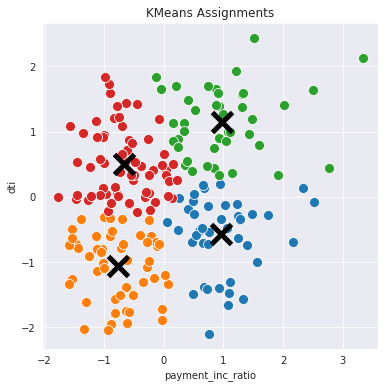

In [12]:
# plot data colored by cluster assignment
def plot_clusters(X,c,km=None,title=None,ax=None):
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,6))
    for i in range(np.max(c)+1):
        X_cluster = X[c == i]
        sns.scatterplot(x=X_cluster.iloc[:,0],y=X_cluster.iloc[:,1],s=100,ax=ax);
    # plot cluster centers
    if km:
        for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5)
    if title:
        ax.set_title(title)
        
plot_clusters(X,c,km,title="KMeans Assignments")

# Plotting clusters and centers

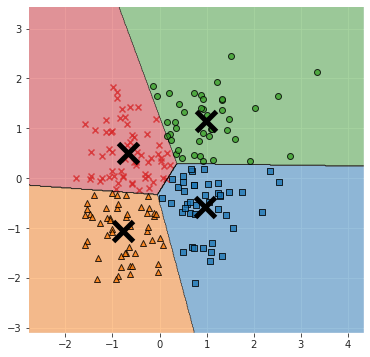

In [13]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values,km.predict(X),km,ax=ax,legend=None);
for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5);

# K-Means: How good are the clusters?

- **Within Cluster Sum of Squares**
- How close is every point to it's assigned cluster center?
<br>

- $\Large \sum_{k=1}^{K} \sum_{x_i\in C_k} \mid\mid x_i-\mu_k\mid\mid_2^2$
<br>

- where $\mid\mid x - \mu \mid\mid_2 = \sqrt{\sum_{j=1}^d (x_j - \mu_j)^2}$
<br>
<br>

- If this is high, items in cluster are far from their means.
- If this is low, items in cluster are close to their means.
<br>


- animated visualization on next slide using Voronoi diagram

# KMeans in Action

In [14]:
import ipywidgets as widgets
kmeans_video = widgets.Video.from_file('images/kmeans.mp4', width=750, autoplay=False, controls=True)
kmeans_video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x048\xd6mdat\x00\x…

From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# Things you need to define for KMeans

- number of clusters $k$ or `n_clusters`
- initial locations of means
  - random
  - k-means++ (pick starting points far apart from each other)

# How to choose $k$, n_clusters?
<br>

- One way: use elbow in sum of squared errors (SSE)
- Stored in KMeans as `.inertia_`

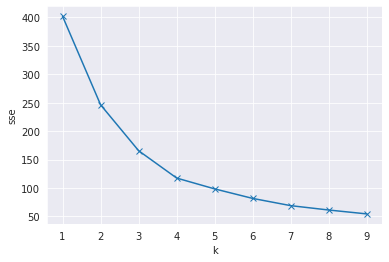

In [15]:
sse = []
for i in range(1,10):
    sse.append(KMeans(n_clusters=i).fit(X).inertia_)

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(range(1,10),sse,marker='x'); 
ax.set_xlabel('k');
ax.set_ylabel('sse');

- Question: What value $k$ will minimize SSE?

## KMeans: Another Example

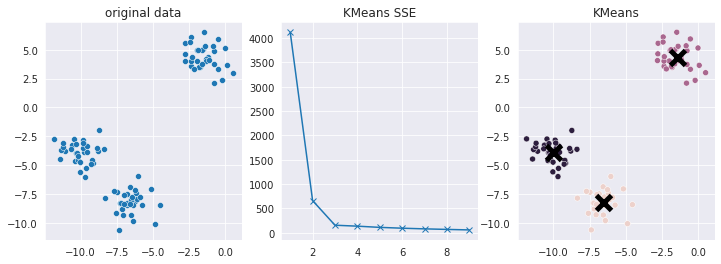

In [16]:
from sklearn.datasets import make_blobs
X_blobs,y_blobs = make_blobs(random_state=1)

fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.scatterplot(x=X_blobs[:,0],y=X_blobs[:,1],ax=ax[0]); 
ax[0].set_title('original data');

sse = [KMeans(n_clusters=i).fit(X_blobs).inertia_ for i in range(1,10)]
ax[1].plot(range(1,10),sse,marker='x');
ax[1].set_title('KMeans SSE')

km_blobs = KMeans(n_clusters=3, random_state=1)
c_blobs = km_blobs.fit_predict(X_blobs)
sns.scatterplot(x=X_blobs[:,0],y=X_blobs[:,1],hue=c_blobs,ax=ax[2],legend=False);
ax[2].set_title('KMeans');
for c in km_blobs.cluster_centers_:
    ax[2].plot(c[0],c[1],marker='x',c='k', ms=15, mew=5)

# Hierarchical Agglomerative Clustering (HAC)
<br>

- group clusters together from the bottom up
- don't have to specify number of clusters up front
- generates binary tree over data

# HAC: How it works
<br>

```
FIRST: every point is it's own cluster

A: Find pair of clusters that are "closest"

B: Merge into single cluster

GOTO A and Repeat till there is a single cluster
```

# HAC in Action

In [17]:
import ipywidgets as widgets
hac_video = widgets.Video.from_file('images/hac.mp4', width=750, autoplay=False, controls=True)
hac_video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00\x811mdat\x00\x…

From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# What is "close"?

- Need to define what we mean by "closeness" by choosing
  - distance metric (how to measure distance)
  - linkage criteria (how to compare clusters)

# Need to define: Distance Metric
<br>

- **Euclidean** : $\sqrt{\sum_{i=1}^n \left(a_i-b_i\right)^2}$
  - easy to use analyitically, sensitive to outliers
<br>
<br>

- **Manhattan** : $\sum_{i=1}^n \mid a_i - b_i \mid$
  - more difficult to use analytically, robust to outliers
<br>
<br>

- **Cosine** : $1 - \frac{\sum{a_i b_i}}{\| a_i \|_2 \| b_i \|_2}$ 
  - angle between vectors while ignoring their scale
<br>
<br>

- many more (see [https://numerics.mathdotnet.com/Distance.html](https://numerics.mathdotnet.com/Distance.html)

# Need to define: **Linkage**
<br>

<div align="center"><img src="images/hac_linkage.png" width="600px"></div>

**single** : shortest distance from item of one cluster to item of the other

**complete** : greatest distance from item of one cluster to item of the other
<br>
<br>

**average** : average distance of items in one cluster to items in the other

**ward** : minimize variance of clusters being merged (only euclidean metric)

# HAC and Dendrograms: Single Linkage


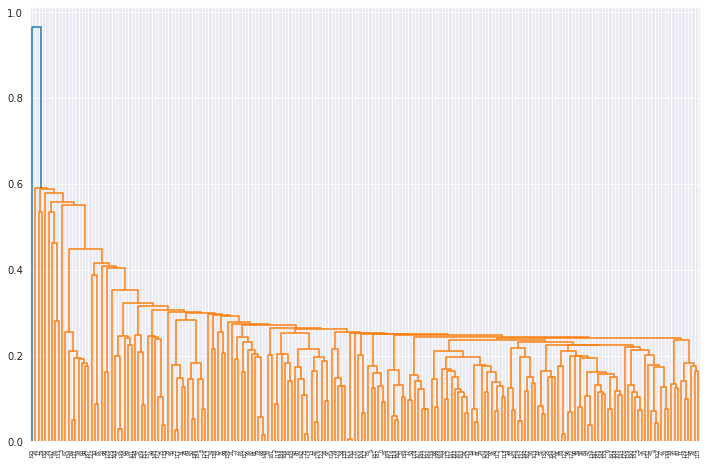

In [18]:
# nice helper function for creating a dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X,'single')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Complete Linkage


In [ ]:
Z = hierarchy.linkage(X,'complete')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Average Linkage

In [ ]:
Z = hierarchy.linkage(X,'average')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Ward Linkage

In [ ]:
Z = hierarchy.linkage(X,'ward')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC in sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(linkage='single',
                              affinity='euclidean',
                              n_clusters=4)
c_single = hac.fit_predict(X)

# generate models and assignments for all linkages
models,assignments = [],[]
linkages = ['single','average','complete','ward']
for linkage in linkages:
    models.append(AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=4))
    assignments.append(models[-1].fit_predict(X))
    
# plot on the next slide

# HAC in sklearn

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
axs = [ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(len(linkage)):
    plot_clusters(X,assignments[i],title=linkages[i],ax=axs[i])

# HAC: Another Example

In [ ]:
models,assignments = [],[]
linkages = ['single','average','complete','ward']
for linkage in linkages:
    models.append(AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=3))
    assignments.append(models[-1].fit_predict(X_blobs))
    
fig,ax = plt.subplots(2,2,figsize=(12,8))
axs = [ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
for i in range(len(linkage)):
    plot_clusters(pd.DataFrame(X_blobs),assignments[i],title=linkages[i],ax=axs[i])

# Clustering: Many Other Methods
<br>

<div align="center"><img src="images/sklearn_clustering_methods.png" width="1000px"></div>

From [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html_)

# How to evaluate clustering?
<br>

- Inertia in k-means (weighted sse)
- If we have labels
  - How "pure" are the clusters? Homogeneity
  - Mutual Information
- Silhouette plots (see PML)
- many others (see sklearn)

# Clustering Review

- k-Means
- Heirarchical Agglomerative Clustering
  - linkages
  - distance metrics
- Evaluating

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Recommendation Engines
<br>

- Given a user and a set of items to recommend (or rank):
<br>
  
  - Recommend things **similar to the things I've liked**
    - Content-Based Filtering
  <br>
  <br>
  
  - Recommend things **that people with similar tastes have liked**
    - Collaborative Filtering 
  <br>
  <br>
  
  - Hybrid/Ensemble


# Example: Housing Data

In [ ]:
df_house = pd.read_csv('../data/house_sales_subset.csv')
df_house = df_house.iloc[:10].loc[:,['SqFtTotLiving','SqFtLot','AdjSalePrice']]
X_house_norm = StandardScaler().fit_transform(df_house)
df_house_norm = pd.DataFrame(X_house_norm,columns=['SqFtTotLiving_norm','SqFtLot_norm','AdjSalePrice_norm'])
df_house_norm.head()

# Content-Based Filtering
<br>

- Find **other things** similar to **the things I've liked**
- Assume: If I like product A, and product B is like product A, I'll like product B
- Use similarity of items
<br>

- Matrix: items x items
- Values: Similarity of items

# Calculate Distances

- to maximize similarity $\rightarrow$ minimize distance

In [ ]:
# using euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

# calculate all pairwise distances between houses
dists = euclidean_distances(X_house_norm)

np.round(dists,2)

# Visualizing Distances With a Heatmap

In [ ]:
from mlxtend.plotting import heatmap
heatmap(np.round(dists,2),figsize=(10,10));

# Query For Similarity

- Imagine I like house 5
- What houses are similar to house 5?

In [ ]:
query_idx = 5
df_house.iloc[query_idx]

In [ ]:
# Distances to house 5
[f'{x:0.1f}' for x in dists[query_idx]]

# Query For Similarity Cont.


In [ ]:
# find indexes of best scores (for distances, want ascending)
best_idxs_asc = np.argsort(dists[query_idx])
best_idxs_asc

In [ ]:
# the top 10 recommendations with distance
list(zip(best_idxs_asc,np.round(dists[query_idx][best_idxs_asc],2)))

# (User Based) Collaborative Filtering

- Recommend things **that people with similar tastes have liked**
- Assume: If both you and I like Movie A, and you like Movie B, I'll like movie B
- Use similarity of user preferences
<br>

- Matrix: Users x Items
- Values: Rankings

<div align="center"><img src="images/user-based_collaborative_filtering.png" width="400px"></div>

# Example: User Interests
<br>
Can we recommend topics based on a users existing interests?

In [ ]:
# from Data Science from Scratch by Joel Grus
#https://github.com/joelgrus/data-science-from-scratch.git

users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [ ]:
# interests of user0
sorted(users_interests[0])

# All Unique Interests

In [ ]:
# get a sorted list of unique interests (here using set)
unique_interests = sorted({interest
                           for user_interests in users_interests
                           for interest in user_interests})

# the first 5 unique interests
unique_interests[:5]

# Transform User Interest Matrix

In [ ]:
# Transform between lists of strings and fixed length lists of ints
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=unique_interests)

# a matrix of "user" rows and "interest" columns
user_interest_matrix = mlb.fit_transform(users_interests)

# The interests for user0
user_interest_matrix[0]

In [ ]:
# transforming back from interest matrix to list of interests
mlb.inverse_transform(user_interest_matrix)[0]

# Calculate Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# using similarity, higher values are better
user_similarities = cosine_similarity(user_interest_matrix)

# what are the similarites for user0 to other users?
user_similarities[0]

In [ ]:
# what users does user0 share interests with?
np.where(user_similarities[0])[0]

# Find Similar Users

In [ ]:
# return a sorted list of users based on similarity
# skip query user and similarity == 0
def most_similar_users_to(query_idx):
    users_scores = [(idx,np.round(sim,4))
                    for idx,sim in enumerate(user_similarities[query_idx])
                    if idx != query_idx and sim > 0]
    return sorted(users_scores, key=lambda x:x[1])

most_similar_users_to(0)

# Recommend Based On User Similarity

- Want to return items sorted by the similarity of other users

In [ ]:
from collections import defaultdict

def user_based_suggestions(user_idx):
    suggestions = defaultdict(float)
    
    # iterate over interests of similar users
    for other_idx, sim in most_similar_users_to(user_idx):
        for interest in users_interests[other_idx]:
            suggestions[interest] += sim
            
    # sort suggestions based on weight
    suggestions = sorted(suggestions.items(),
                        key=lambda x:x[1],
                        reverse=True)
    
    # return only new interests
    return [(suggestion,weight)
            for suggestion,weight in suggestions
            if suggestion not in users_interests[user_idx]]

# Recommend Based On User Similarity

In [ ]:
# reminder: original interests
users_interests[0]

In [ ]:
# top 5 new recommended interests
user_based_suggestions(0)[:5]

# Issues with Collab. Filtering
<br>

- **the cold start problem** : What if it's your first time?
<br>

- **sparcity** : How to recommend movies no one's seen?

# Evaluating Rec. Systems
<br>

- **Precision@N**: Out of top N, how many were true?
<br>

- **Recall@N**: Out of all true, how many were in top N
<br>

- Surprise/Novelty?
<br>

- Diversity?

# Spotify's Recommendation Engine
<br>

[How Does Spotify Know You So Well?](https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe)
<br>

<div align="center"><img src="images/spotify.png" width="1000px"></div>

# Recommendation Engines Review

- Content-Based
- User-Based Collaborative Filtering
- Issues
- Evaluating

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Time Series
<br>

- Data ordered in time
<br>

- Applications
  - Financial
  - Economic
  - Scientific
  - etc.

# Time Series Differences
<br>

- **Non-i.i.d.** :  not independent and identically distributed
<br>

- not independent
  - Ex: Stock price
<br>
<br>

- not-identically distributed
  - Ex: Seasonality
<br>
<br>

- Order matters

# Representing Time in Python

- `datetime` library
- Pandas `Timestamp`

# `datetime.date`

In [ ]:
from datetime import date

friday = date(2020,12,4) # year,month,day
friday

In [ ]:
today = date.today()
today

In [ ]:
today.year

# `datetime.time`

In [ ]:
from datetime import time

noon = time(12,0,0) # hour,minute,second,microsecond 
noon

In [ ]:
noon.hour

# `datetime.datetime`

In [ ]:
from datetime import datetime

# year,month,day,hour,minute,second,microsecond
monday_afternoon = datetime(2020,11,30,19,10)
monday_afternoon

In [ ]:
now = datetime.now()
now

# `datetime.timedelta`

In [ ]:
diff = datetime(2020,11,30,1) - datetime(2020,11,29,0)
diff

In [ ]:
diff.total_seconds()

In [ ]:
from datetime import timedelta

#days,seconds,microseconds,milliseconds,minutes,hours,weeks
one_day = timedelta(1)

date(2020,11,30) + 2*one_day

# Printing Datetimes: `strftime()`

In [ ]:
print(now)

In [ ]:
now.strftime('%a %h %d, %Y %I:%M %p')

See [strftime.org](http://strftime.org)

# Parsing Datetimes: `pandas.to_datetime()`

- `dateutil.parser` available
- pandas has parser built in: `pd.to_datetime()`
    

In [ ]:
pd.to_datetime('11/22/2019 2:36pm')

In [ ]:
dt_index = pd.to_datetime([datetime(2020, 11, 26),
                           '27th of November, 2020',
                           '2020-Nov-28',
                           '11-29-2030',
                           '20201130',
                           None
                          ])
dt_index

# `pandas.Timestamp`

- like datetime.datetime
- can include **timezone** and **frequency** info
- can handle a missing time: `NaT`
- can be used anywhere datetime can be used
- an array of Timestamps can be used as an index

In [ ]:
dt_index[0]

# DateIndex Indexing/Selecting/Slicing

In [ ]:
s = pd.Series([101,102,103],
              index=pd.to_datetime(['20191201','20200101','20200201']))
s

In [ ]:
# can index normally using iloc
s.iloc[0:2]

# DateIndex Indexing/Selecting/Slicing Cont.

In [ ]:
# only rows from the year 2020
s.loc['2020']

In [ ]:
# only rows from January 2020
s.loc['2020-01']

In [ ]:
# only rows between Jan 1st 2019 and Jan 1st 2020, inclusive
s.loc['01/01/2019':'01/01/2020']

In [ ]:
# can use the indexing shortcut
s['2020']

# Datetimes in DataFrames

In [ ]:
df = pd.DataFrame([['12/1/2020',101,'A'],
                   ['1/1/2021',102,'B']],columns=['col1','col2','col3'])
df.col1 = pd.to_datetime(df.col1)
df.set_index('col1',drop=True,inplace=True)
df

In [ ]:
# only return rows from 2020
df.loc['2020']

# Timestamp Index: Setting Frequency

In [ ]:
s = pd.Series([101,103],index=pd.to_datetime(['20201201','20201203']))
s

In [ ]:
# Use resample() and asfreq() to set frequency
s.resample('D').asfreq()

In [ ]:
pd.to_datetime(['20191201','20191203'])

In [ ]:
# Use date_range with freq to get a range of dates of a certain frequency
pd.date_range(start='20191201',end='20191203',freq='D')

# Sample of Available Frequencies

[https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

# Timezones

- Handled by `pytz` library

In [ ]:
import pytz

[x for x in pytz.common_timezones if x.startswith('U')]

UTC: coordinated universal time (EST is 5 hours behind, -5:00)

# Timezones Cont.

In [ ]:
ts = pd.date_range('11/2/2019 9:30am',periods=2,freq='D')
ts

In [ ]:
# Set timezone using .localize()
ts_utc = ts.tz_localize('UTC')
ts_utc

In [ ]:
# Change timezones using .tz_convert()
ts_utc.tz_convert('US/Eastern')

# Timeseries in Python so far:
<br>

- `datetime .date .time .datetime .timedelta`
- format with `.strftime()`
- parse time with `pd.to_datetime()`
- `pandas Timestamp Timedelta DatetimeIndex`
- Indexing with `DatetimeIndex`
- Frequencies
- Timezones
<br>

Additional pandas functionality we won't discuss:
- `Period` and `PeriodIndex`
- `Panels`
<br>
<br>

Next: Operations on Time Series data

# Shifting

- Moving data backward or forward in time (lagging/leading)
- Ex: calculate percent change

In [ ]:
ts = pd.Series([1,2,8],
               index=pd.date_range('1/1/2019',periods=3,freq='M'))
ts

In [ ]:
ts.shift(1) # old value

# Shifting

- **percent change** : 
  - (new_value - old_value) / old_value
  - (new_value / old_value) - 1

In [ ]:
#  multiply by 100 to turn into a percent
((ts / ts.shift(1)) - 1) * 100

# Example Dataset: Twitter Stock

In [ ]:
# first run: conda install pandas-datareader
#from pandas_datareader import data
#df_twtr = data.DataReader('TWTR', start='2015', end='2021', data_source='yahoo') 
df_twtr = pd.read_csv('../data/twtr_2015-2020.csv',parse_dates=['Date'],index_col='Date')
df_twtr.head(3)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df_twtr[['Close']].plot(ax=ax);
ax.set_ylabel('stock price');

# Example Dataset: Twitter Stock

- Calculate Percent Change of Close

In [ ]:
(df_twtr.Close / df_twtr.Close.shift(1) - 1).tail(5)

In [ ]:
# plot percent change of close in 2020
fig,ax = plt.subplots(1,1,figsize=(12,6))
close_2020 = df_twtr.loc['2020','Close']
((close_2020 / close_2020.shift(1)) - 1 ).plot(marker='x',ax=ax);
ax.set_ylabel('percent change');

# Resampling

- Convert from one frequency to another
<br>

- Downsampling
  - from higher to lower (day to month)
  - need to aggregate
<br>
<br>

- Upsampling
  - from lower to higher (month to day)
  - need to fill missing
<br>
<br>

- Can also be used to set frequency from None

# Resampling: Initialize Frequency

In [ ]:
df_twtr.index

In [ ]:
df_twtr_B = df_twtr.resample('B').asfreq() # set frequncy to business day
df_twtr_B.index

# Resampling: Downsampling

- Go from shorter to longer
- Need to aggregate (like groupby)
- Example: Downsampling from business day to business quarter
    

In [ ]:
df_twtr_BQ = df_twtr.resample('BQ')
df_twtr_BQ

In [ ]:
str(df_twtr_BQ)

In [ ]:
df_twtr_BQ.mean().head(3)

# Resampling: Downsampling
    

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df_twtr_B.Close.plot(style='-', label='by B',ax=ax)
df_twtr_BQ.Close.mean().plot(style='--',label='by BQ',ax=ax)
plt.legend(loc='upper right');

# Resampling: Upsampling

- Go from longer to shorter
- Need to decide how to handle missing values
- Example: Upsample from business day to hour

In [ ]:
df_twtr_B.Close.resample('H').asfreq().head(10)

# Resampling: Upsampling

- `ffill()` : Forward Fill

In [ ]:
df_twtr_B.Close.resample('H').ffill().head(3)

- `bfill()`: Backward Fill
    

In [ ]:
df_twtr_B.Close.resample('H').bfill().head(3)

# Moving Windows

- Apply function on a fixed window moving accross time
- Method of smoothing out the data
- **center** : place values at center of window
   

In [ ]:
df_twtr_B.Close['2020-11-02':'2020-11-06']

In [ ]:
rolling = df_twtr_B.Close.rolling(5, center=True)
rolling

In [ ]:
rolling.mean()['2020-11-02':'2020-11-06']

# Moving Windows

In [ ]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(1,1,figsize=(16,8));
df_twtr_B['2020'].Close.plot(style='-',alpha=0.3,label='business day');
rolling.mean()['2020'].plot(style='--',label='5 day rolling window mean');
(rolling.mean()['2020'] + 2*rolling.std()['2020']).plot(style=':',c='g',label='_nolegend_');
(rolling.mean()['2020'] - 2*rolling.std()['2020']).plot(style=':',c='g',label='_nolegend_');
ax.legend();

# Timeseries Operations Review

- Shifting
- Resampling 
  - Downsampling
  - Upsampling
- Moving/Rolling Windows

<br>
<br>

# <center>Questions?</center>
<br>
<br>